In [1]:
#IMPORT NECESSARY MODULES
import pandas as pd
import datetime
import numpy as np
#CHANGE DISPLAY OPTIONS TO SHOW MORE ROWS AND COLUMNS
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#LIST OF ALL JOURNALS AND THEIR GROUPS
online_journals = [
    ['American Journal of Distance Education','0892-3647'],
    ['Distance Education','0158-7919'],
    ['E-Learning','1741-8887'],
    ['Electronic Journal of e-Learning','1479-4403'],
    ['International Journal of Distance Education Technologies','1539-3100'],
    ['International Review of Research in Open and Distance Learning','1492-3831'],
    ['International Journal of Mobile and Blended Learning','1941-8647'],
    ['Journal of Educators Online','1547-500X'],
    ['Journal of E-Learning and Knowledge Society','1826-6223'],
    ['Journal of Library and Information Services in Distance Learning','1533-290X'],
    ['Journal of Interactive Online Learning','1541-4914'],
    ['Open Learning','0268-0513'],
    ['Turkish Online Journal of Distance Education','1302-6488'],
]

ed_tech_journals = [
    ['Australasian Journal of Educational Technology','1449-5554'],
    ['British Journal of Educational Technology','0007-1013'],
    ['Bulletin of the Technical Committee on Learning Technology','2306-0212'],
    ['Computer Assisted Language Learning','0958-8221'],
    ['Computers and Education','0360-1315'],
    ['Computers in Education Journal','1069-3769'],
    ['Computers in the Schools','0738-0569'],
    ['Cutting-Edge Technologies in Higher Education','2044-9968'],
    ['DESIDOC Journal of Library and Information Technology','0974-0643'],
    ['Education and Information Technologies','1360-2357'],
    ['Educational Communication and Technology Journal','0148-5806'],
    ['Educational Media International','0952-3987'],
    ['Educational Technology and Society','1436-4522'],
    ['Educational Technology Research and Development','1042-1629'],
    ['Interactive Learning Environments','1049-4820'],
    ['Interactive Technology and Smart Education','1741-5659'],
    ['International Journal of Computer Supported Collaborative Learning','1556-1607'],
    ['International Journal of Educational Technology in Higher Education','EISSN: 2365-9440'],
    ['International Journal of Information and Communication Technology Education','1550-1876'],
    ['International Journal of Information and Learning Technology','2056-4880'],
    ['International Journal of Innovation and Learning','1471-8197'],
    ['International Journal of Learning Technology','1477-8386'],
    ['International Journal of Technologies in Learning','2327-0144'],
    ['International Journal of Technology and Design Education','0957-7572'],
    ['International Journal of Technology Enhanced Learning','1753-5255'],
    ['International Journal of Web-Based Learning and Teaching Technologies','1548-1093'],
    ['Internet and Higher Education','1096-7516'],
    ['Journal of Computer-Assisted Learning','0266-4909'],
    ['Journal of Computing in Higher Education','1042-1726'],
    ['Journal of Educational Computing Research','0735-6331'],
    ['Journal of Educational Multimedia and Hypermedia','1055-8896'],
    ['Journal of Interactive Learning Research','1093-023X'],
    ['Journal of Research on Technology in Education','1539-1523'],
    ['Journal of Technology, Learning, and Assessment','1540-2525'],
    ['Knowledge Management and E-Learning','2073-7904'],
    ['Language, Learning, & Technology','1094-3501'],
    ['Learning, Media and Technology','1743-9884'],
    ['Performance Improvement Quarterly','0898-5952'],
    ['Research in Learning Technology','2156-7069'],
    ['Technology, Knowledge and Learning','2211-1662'],
    ['Technology, Pedagogy and Education','1475-939X'],
    ['TechTrends','8756-3894'],
    ['Turkish Online Journal of Educational Technology','1303-6521']
]
    
education_journals = [
    ['Cognition and Instruction','0737-0008'],
    ['International Journal of Instruction','1694-609X'],
    ['International Journal of Knowledge and Learning','1741-1009'],
    ['International Journal of Learning','1447-9494'],
    ['Instructional Science','0020-4277'],
    ['Journal of Learning Sciences','1050-8406'],
    ['Learning and Instruction','0959-4752'],
    ['Learning Environments Research','1387-1579'],
    ['Memory and Cognition','0090-502X'],
]

computer_science_journals = [
    ['International Journal of Mobile Human Computer Interaction','1942-390X'],
    ['International Journal of Technology and Human Interaction','1548-3908'],
    ['International Journal of Artificial Intelligence in Education','1560-4292'],
    ['Australian Educational Computing','0816-9020'],
    ['Computers in Human Behavior','0747-5632'],
    ['Human-Computer Interaction','0737-0024'],
    ['IEEE Transactions on Learning Technologies','1939-1382'],
    ['Information Technology and Libraries','0730-9295'],
    ['International Journal of Human Computer Studies','1071-5819'],
    ['International Journal of Human-Computer Interaction','1044-7318'],
    ['Journal of Computer-Mediated Communication','1083-6101'],
]
#READ ALL DATA AND APPEND TO NEW DATAFRAME
import os
base = 'C:/Users/bodil/Projects/Rick Journal Data/'
df = pd.DataFrame()
for file_name in os.listdir(base + 'Data/'):
    df2 = pd.read_csv(base + 'Data/' + file_name, low_memory=False)
    df2['journal'] = file_name.split('.')[0]
    df = df.append(df2)
df = df[df.articleType == 'Article'].copy()
df = df[df.abstract == df.abstract].copy()

In [2]:
#removing first and last sentences that are dealing with copyright and publication name.
def parse_abstract(cell):
    cell_list = cell.split('.')
    first_sentence = '©' in cell_list[0] or 'Taylor & Francis' in cell_list [0] or 'All rights reserved' in cell_list[0] or \
    ' LLC.' in cell_list[0] or 'Elsevier' in cell_list[0] or 'Springer' in cell_list[0]
    second_sentence = 'All rights reserved' in cell_list[1]
    last_sentence = '©' in cell_list[-1] or 'Taylor & Francis' in cell_list [-1] or 'All rights reserved' in cell_list[-1] or \
    ' LLC.' in cell_list[-1] or 'Elsevier' in cell_list[-1] or 'Springer' in cell_list[-1]
    if second_sentence and last_sentence:
        return '.'.join(cell_list[2:-1])
    elif second_sentence and not last_sentence:
        return '.'.join(cell_list[2:])
    elif first_sentence and last_sentence:
        return '.'.join(cell_list[1:-1])
    elif first_sentence and not last_sentence:
        return '.'.join(cell_list[1:])
    elif not first_sentence and last_sentence:
        return '.'.join(cell_list[:-1])
    else:
        return '.'.join(cell_list)

In [3]:
df['new_abstract'] = df.abstract.map(parse_abstract)

In [4]:
df.reset_index(inplace=True,drop=True)

In [5]:
#tokenize each abstract into a list of sentences
from nltk import tokenize
df['sentence_abstract_list'] = df['new_abstract'].map(lambda x: tokenize.sent_tokenize(x))

In [6]:
tempdf = df[['sentence_abstract_list']].copy()

In [7]:
#this is a confusing piece of code, but it just unstacks a series of lists into a single series
finaldf = pd.DataFrame({
    col:np.repeat(tempdf[col].values, tempdf['sentence_abstract_list'].str.len())
    for col in tempdf.columns.difference(['sentence_abstract_list'])
    }).assign(**{'sentence_abstract_list':np.concatenate(tempdf['sentence_abstract_list'].values)})[tempdf.columns.tolist()]

In [8]:
#splits each sentence into a list of words
finaldf['sentence_abstract_series_of_lists_of_words'] = finaldf['sentence_abstract_list'].map(lambda x: x.split(' '))

In [9]:
import string
translator = str.maketrans('','',string.punctuation + '’')
def remove_punctuation(cell):
    word_list = []
    for word in cell:
        word = word.translate(translator)
        if word == ' ' or word == '':
            pass
        else:
            word_list.append(word.lower())
    return word_list

finaldf['sentence_abstract_series_of_lists_of_words'] = finaldf['sentence_abstract_series_of_lists_of_words'].map(remove_punctuation)

In [10]:
sentences = finaldf.sentence_abstract_series_of_lists_of_words.values

In [11]:
from gensim.models import Word2Vec
from gensim.models import Phrases

C:\Users\bodil\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [12]:
phrases = Phrases(sentences)

In [13]:
from gensim.models.phrases import Phraser
bigram = Phraser(phrases)

In [14]:
finaldf['bigram_sentences'] = finaldf.sentence_abstract_series_of_lists_of_words.map(lambda x: bigram[x])

In [15]:
sentences = finaldf.bigram_sentences.values

In [16]:
print('number of sentences')
print(len(sentences))

number of sentences
334312


In [17]:
%matplotlib inline
finaldf['length'] = finaldf['bigram_sentences'].map(lambda x: len(x))

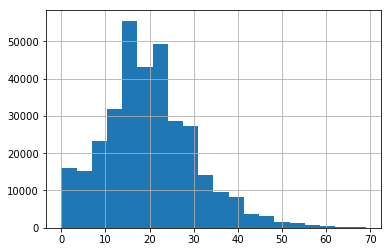

In [18]:
finaldf[finaldf['length'] < 70]['length'].hist(bins=20)

In [19]:
def compute_training_examples(cell):
    if cell < 12:
        return 1
    else:
        return cell - 10

In [20]:
print('number of training examples for your sentences')
print(finaldf['length'].map(compute_training_examples).sum())

number of training examples for your sentences
3720035


In [21]:
# sentences is a list of sentences, each broken up into a list of words
# sg {1, 0} - 1 = skip-gram, 0 = CBOW
# size: dimensionality of the feature vectors
# window: the maximum distance between the current and predicted word
# alpha: the initial learning rate
# min_alpha: learning rate will drop linearly to min_alpha throughout training
# seed: for the random number generator (to get reproducible results, use seed, workers=1, and PYTHONHASHSEED environment variable)
# min_count: ignores all words with total frequency lower than this
# max_vocab_size: Limits the RAM during vocabulary building. 10M word types needs 1 GB of RAM
# sample: the threshold for configuring which higher-frequency words are randomly downsampled
# workers: faster training with multicore machines
# hs {1, 0} 1 = hierarchical softmax, 0 = (if negative = 0) negative sampling
# negative: If greater than 0, negative sampling will be used, specifies how many "noise words" should be drawn. 
# cbow_mean: If 0 use sum of context word vectors. If 1, use the mean (when CBOW is used only)
# hashfxn to use to increase training reproducibility
# iter: number of iterations over corpus
# trim_rule
# sorted_vocab: 1, 0 -> sort vocab by descending frequency before assigning word indexes
# batch_words: target word size for batches of examples passed to workers
# compute_loss: If true, computes and stores loss value which can be retrieved using model.get_latest_training_loss()

In [25]:
model = Word2Vec(sentences, size=300, window=5, min_count=5, workers=4, compute_loss=True)

In [22]:
fname = 'C:/Users/bodil/Projects/NLP/word2vec_two_word_phrase_model'
# model.save(fname)

In [23]:
from gensim.models import Word2Vec
from gensim.models import Phrases
from gensim.models.phrases import Phraser

model = Word2Vec.load(fname)  # you can continue training with the loaded model!

In [85]:
model.get_latest_training_loss()

11192044.0

In [249]:
model.wv.most_similar(positive=['experiment'],topn=10)

[('pilot_study', 0.706141471862793),
 ('second_experiment', 0.7003641724586487),
 ('two_experiments', 0.6984073519706726),
 ('experiments', 0.6948020458221436),
 ('laboratory_experiment', 0.6618783473968506),
 ('experiment_2', 0.656216025352478),
 ('three_experiments', 0.6447980999946594),
 ('four_experiments', 0.6298415064811707),
 ('experiment_1', 0.6224700808525085),
 ('study', 0.615963339805603)]

In [103]:
#worst case scenario, 5 levels deep using random word from top 10 still gives me good results.
#best case scenario, 10 levels deep using random word from top 10 still gives me good results.
model.wv.most_similar(positive=['were_coded','focus_groups'], negative=['anova'],topn=10)

[('focus_group', 0.7036417722702026),
 ('interviews', 0.6902740001678467),
 ('field_notes', 0.6847454309463501),
 ('diaries', 0.6824070811271667),
 ('classroom_observations', 0.6763336658477783),
 ('transcripts', 0.6669037342071533),
 ('semistructured_interviews', 0.6653559803962708),
 ('meetings', 0.6380455493927002),
 ('semistructured', 0.6266620755195618),
 ('video_recordings', 0.6200464963912964)]

# Start of Semi-Supervised Text Classification

In [78]:
import random

In [96]:
def get_top_words_and_score(word):
    top_ten_similar = [x[0] for x in model.wv.most_similar(word,topn=10)]
    return top_ten_similar

def get_a_single_depth(input_all_words):
    import random
    output_all_words = []
    word = input_all_words[random.randint(0,len(input_all_words)-1)]
    output_all_words += get_top_words_and_score(word)
    return output_all_words

def get_word_counts(iterations, initial_word_list, levels_deep):
    all_words = []
    for count in range(iterations):
        for word in initial_word_list:
            words = get_a_single_depth(get_top_words_and_score(word))
            for x in range(levels_deep):
                words = get_a_single_depth(words)
                all_words += words
    word_counts = pd.Series(all_words).value_counts()
    return word_counts

def get_top_words_and_score_pos_neg(word,word2,neg_word):
    top_ten_similar = [x[0] for x in model.wv.most_similar(positive=[word,word2],negative=neg_word,topn=10)]
    return top_ten_similar

def get_a_single_depth_pos_neg(word1,input_all_words):
    import random
    output_all_words = []
    word = input_all_words[random.randint(0,len(input_all_words)-1)]
    output_all_words += get_top_words_and_score_pos_neg(word1,word,'')
    return output_all_words

def get_word_counts_pos_neg(iterations, initial_word_list, levels_deep):
    all_words = []
    for count in range(iterations):
        for word in initial_word_list:
            word1 = initial_word_list[random.randint(0,len(initial_word_list) - 1)]
            if word1 == word:
                word1 = initial_word_list[random.randint(0,len(initial_word_list) - 1)]
            words = get_a_single_depth_pos_neg(word1, get_top_words_and_score_pos_neg(word1,word,''))
            for x in range(levels_deep):
                words = get_a_single_depth_pos_neg(word1,words)
                all_words += words
    word_counts = pd.Series(all_words).value_counts()
    return word_counts

In [211]:
initial_quant_words = ['linear_regression','t_test','anova','sem','efa','factor_analysis','statistical_analysis']
initial_qual_words = ['transcribed','interviews','focus_groups','observation','field_notes']

In [234]:
quant_word_counts = get_word_counts(iterations=30, initial_word_list=initial_quant_words, levels_deep=4)

In [235]:
quant_word_counts = quant_word_counts / quant_word_counts.max()

In [236]:
quant_word_counts = quant_word_counts[quant_word_counts > .02]

In [133]:
qual_word_counts = get_word_counts_pos_neg(iterations=30, initial_word_list=initial_qual_words, levels_deep=4)

In [134]:
qual_word_counts = qual_word_counts / qual_word_counts.max()

In [150]:
qual_word_counts = qual_word_counts[~qual_word_counts.index.isin(['quantitative_data','inferential_statistics'])]

In [191]:
qual_word_counts = qual_word_counts[qual_word_counts > .004]

In [46]:
def bigram_function(cell):
    sentence_list = []
    if cell == cell:
        for y in cell:
            sentence_list.append(bigram[y.split(' ')])
    return sentence_list
df['bigram_sentence_abstract_list'] = df['sentence_abstract_list'].map(bigram_function)

In [47]:
def join_lists_together(cell):
    new_cell = []
    for sentence in cell:
        new_cell += sentence
    return new_cell

df['word_list_for_classification'] = df.bigram_sentence_abstract_list.map(join_lists_together)

In [237]:
def classify_word_lists(cell):
    quant_score = 0
    quant_words = []
    qual_score = 0
    qual_words = []
    for word in cell:
        if word in quant_word_counts.index:
            quant_score += quant_word_counts.loc[word]
            quant_words += [word]
        if word in qual_word_counts.index:
            qual_score += qual_word_counts.loc[word]
            qual_words += [word]
    return quant_score,qual_score,quant_words,qual_words
df['classification_scores'] = df.word_list_for_classification.map(classify_word_lists)

In [238]:
df['quant_score'] = df.classification_scores.map(lambda x: x[0])
df['qual_score'] = df.classification_scores.map(lambda x: x[1])
df['quant_words'] = df.classification_scores.map(lambda x: x[2])
df['qual_words'] = df.classification_scores.map(lambda x: x[3])

In [239]:
quant_cut_off = 0 #df[df.quant_score > 0].quant_score.quantile(.4)
qual_cut_off = 0 #df[df.qual_score > 0].qual_score.quantile(.4)

In [240]:
df.loc[df.quant_score <= quant_cut_off,'quant_class'] = 0
df.loc[df.quant_score > quant_cut_off,'quant_class'] = 1
df.loc[df.qual_score <= qual_cut_off,'qual_class'] = 0
df.loc[df.qual_score > qual_cut_off,'qual_class'] = 1

In [241]:
#class distributions between qualitative, quantitative, and supposedly mixed methods
(df.quant_class.astype(int).astype(str) + df.qual_class.astype(int).astype(str)).value_counts()

00    37450
01     5115
10     2293
11      354
dtype: int64

In [221]:
temp = df[(df.quant_class == 0)&(df.qual_class == 0)]

In [242]:
temp[['abstract','quant_score','qual_score','quant_words','qual_words']]

,abstract,quant_score,qual_score,quant_words,qual_words
1,"© 2018 Taylor & Francis Group, LLC. This art...",0.0,0.0,[],[]
2,"© 2017 Taylor & Francis Group, LLC. A random...",0.0,0.0,[],[]
3,"© 2017 Taylor & Francis Group, LLC. An ego n...",0.0,0.0,[],[]
4,"© 2017 Taylor & Francis Group, LLC. The majo...",0.0,0.0,[],[]
5,"© 2017 Taylor & Francis Group, LLC. Massive ...",0.0,0.0,[],[]
7,"© 2017 Taylor & Francis Group, LLC. This the...",0.0,0.0,[],[]
8,© 2017 Educational Testing Service. Online hig...,0.0,0.0,[],[]
9,"© 2017 Taylor & Francis Group, LLC. This pap...",0.0,0.0,[],[]
10,"© 2017 Taylor & Francis Group, LLC. North Ca...",0.0,0.0,[],[]
11,"© 2017 Taylor & Francis Group, LLC. The grow...",0.0,0.0,[],[]
